In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data

The data is a sample end of day data. The data contains a set of stocks, but we'll be looking at stocks in the S&P 500. We also made things a little easier to run by narrowing down our range of time period instead of using all of the data.

In [36]:
df = pd.read_csv('eod-quotemedia.csv', parse_dates=['date'], index_col=False)
close = df.reset_index().pivot(index='date', columns='ticker', values='adj_close')

In [37]:
close.head()

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-07-01,29.994186,16.176093,81.138217,53.109173,34.924478,50.863198,31.425388,64.694095,46.235,39.913360,...,27.668791,35.288928,76.320802,40.023873,22.106665,25.753386,45.480383,71.898827,27.858587,29.447893
2013-07-02,29.650137,15.819834,80.722073,54.312247,35.428076,50.696766,31.272881,64.712041,46.030,39.860576,...,27.542284,35.059033,76.608168,39.965530,22.082740,25.613675,45.402661,72.934172,28.038932,28.572441
2013-07-03,29.705185,16.127950,81.237299,54.612043,35.444862,50.937167,30.725650,65.214519,46.420,40.186077,...,27.334452,35.280086,76.650427,40.004426,22.202365,25.734758,46.063299,72.301458,28.181310,28.168387
2013-07-05,30.434568,16.214608,81.821882,54.173381,35.856134,51.371737,31.326707,66.075911,47.000,40.652334,...,27.695899,35.801771,77.394196,40.675380,22.585164,26.060750,46.413048,73.164246,29.396267,29.024598
2013-07-08,30.524021,16.310894,82.951417,53.865799,36.661889,52.037461,31.766285,66.820655,46.625,40.256455,...,27.985057,35.200507,77.968926,40.646208,22.489464,26.228403,46.950626,73.892823,29.576612,29.765365


Let's look at the price of APPLE stock over the years

<AxesSubplot:xlabel='date'>

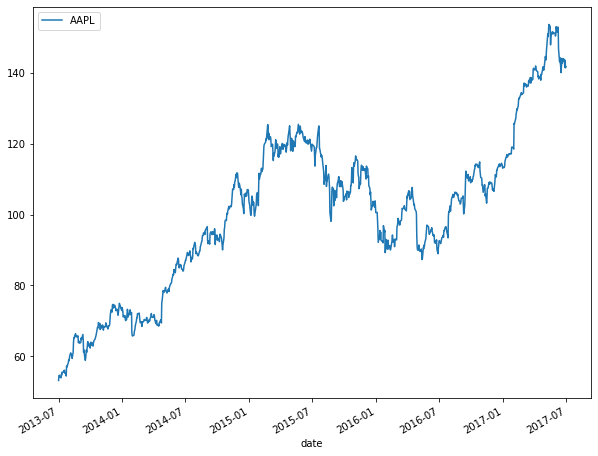

In [38]:
close.plot(figsize=(10, 8), y = 'AAPL')

# Resample Adjusted Prices

We resample the data using the month-end prices to perform trading once a month. To do this, we first resample the daily adjusted closing prices into monthly buckets, and select the last observation of each month.

In [39]:
def resample_prices(close_prices, freq='M'):
    """
    Resample close prices for each ticker at specified frequency.
    
    Parameters
    ----------
    close_prices : DataFrame
        Close prices for each ticker and date
    freq : str
        What frequency to sample at
        For valid freq choices, see http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
    
    Returns
    -------
    prices_resampled : DataFrame
        Resampled prices for each ticker and date
    """
    
    return close_prices.resample(freq).last()

In [40]:
monthly_close = resample_prices(close)
monthly_close.head()

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-07-31,30.778617,18.631393,81.732709,58.730009,38.521450,53.877450,32.990815,66.228449,47.28,43.441078,...,28.328432,41.283890,79.236714,41.696397,23.207213,23.219961,47.447784,80.028191,28.133851,28.740319
2013-08-31,32.092884,15.559861,79.334925,63.649943,36.090567,53.017321,30.018669,64.828687,45.75,41.013736,...,26.710955,38.600581,74.178477,40.830963,23.877112,23.188665,45.560804,75.819706,26.584661,28.104002
2013-09-30,35.346979,18.255876,81.982130,62.282664,37.886202,56.910722,29.892578,66.075911,51.94,41.696116,...,27.977014,41.650756,73.225288,42.277383,24.755162,26.136377,46.452239,78.936357,26.061902,30.003311
2013-10-31,35.009028,21.154093,98.342860,68.285838,41.396376,60.850696,33.055761,66.822997,54.22,43.690086,...,27.750075,40.386592,76.272087,45.870693,23.913149,32.417109,44.244047,84.058477,26.988611,30.585820
2013-11-30,36.947077,22.608016,100.157413,73.070375,41.396376,65.917191,34.538974,70.432348,56.78,42.732980,...,29.039087,39.716074,80.102213,46.313771,27.377429,32.473487,50.826346,87.844811,27.916745,30.093124


PLotting the APPLE stock price after re-sampling monthly

<AxesSubplot:xlabel='date'>

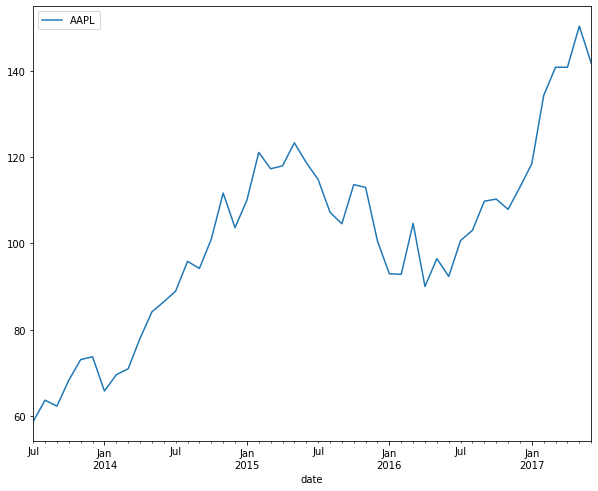

In [45]:
monthly_close.plot(figsize=(10, 8), y = 'AAPL')

# Compute Log Returns

We compute the log returns ($R_t$) from prices ($P_t$) as our primary momentum indicator:

$$R_t = log_e(P_t) - log_e(P_{t-1})$$

In [41]:
def compute_log_returns(prices):
    """
    Compute log returns for each ticker.
    
    Parameters
    ----------
    prices : DataFrame
        Prices for each ticker and date
    
    Returns
    -------
    log_returns : DataFrame
        Log returns for each ticker and date
    """
    previous_prices = prices.shift(periods = 1)
    
    return np.log(prices / previous_prices)

In [42]:
monthly_close_returns = compute_log_returns(monthly_close)
monthly_close_returns.head()

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-31,0.041814,-0.180153,-0.029776,0.080448,-0.065184,-0.016093,-0.094410,-0.021362,-0.032896,-0.057498,...,-0.058792,-0.067205,-0.065966,-0.020974,0.028457,-0.001349,-0.040582,-0.054021,-0.056639,-0.022389
2013-09-30,0.096579,0.159792,0.032823,-0.021715,0.048555,0.070865,-0.004209,0.019056,0.126897,0.016501,...,0.046309,0.076052,-0.012933,0.034812,0.036114,0.119665,0.019377,0.040284,-0.019860,0.065396
2013-10-31,-0.009607,0.147346,0.181959,0.092019,0.088606,0.066939,0.100586,0.011243,0.042961,0.046713,...,-0.008145,-0.030822,0.040766,0.081574,-0.034606,0.215358,-0.048704,0.062871,0.034940,0.019229
2013-11-30,0.053881,0.066471,0.018283,0.067721,0.000000,0.079976,0.043893,0.052605,0.046134,-0.022150,...,0.045404,-0.016742,0.048996,0.009613,0.135290,0.001738,0.138694,0.044059,0.033812,-0.016240


PLotting the monthly returns

<AxesSubplot:xlabel='date'>

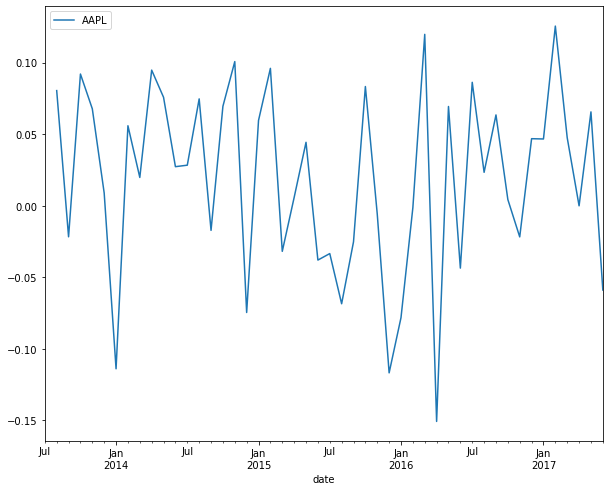

In [46]:
monthly_close_returns.plot(figsize=(10, 8), y = 'AAPL')

# Shift Returns

We implement the shift_returns function to shift the returns by a certain period. Positive period means shifting forward and negative means shifting back. We compute the lookahead returns (next month's) and previous returns (previous month's)

In [43]:
def shift_returns(returns, shift_n):
    """
    Generate shifted returns
    
    Parameters
    ----------
    returns : DataFrame
        Returns for each ticker and date
    shift_n : int
        Number of periods to move, can be positive or negative
    
    Returns
    -------
    shifted_returns : DataFrame
        Shifted returns for each ticker and date
    """
    
    return returns.shift(periods = shift_n)

In [60]:
prev_returns = shift_returns(monthly_close_returns, 1)
lookahead_returns = shift_returns(monthly_close_returns, -1)
prev_returns.head()

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-30,0.041814,-0.180153,-0.029776,0.080448,-0.065184,-0.016093,-0.094410,-0.021362,-0.032896,-0.057498,...,-0.058792,-0.067205,-0.065966,-0.020974,0.028457,-0.001349,-0.040582,-0.054021,-0.056639,-0.022389
2013-10-31,0.096579,0.159792,0.032823,-0.021715,0.048555,0.070865,-0.004209,0.019056,0.126897,0.016501,...,0.046309,0.076052,-0.012933,0.034812,0.036114,0.119665,0.019377,0.040284,-0.019860,0.065396
2013-11-30,-0.009607,0.147346,0.181959,0.092019,0.088606,0.066939,0.100586,0.011243,0.042961,0.046713,...,-0.008145,-0.030822,0.040766,0.081574,-0.034606,0.215358,-0.048704,0.062871,0.034940,0.019229


Plotting the previous month's returns

<AxesSubplot:xlabel='date'>

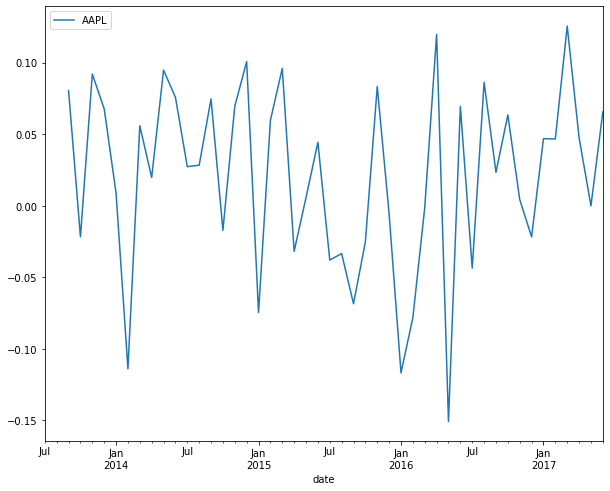

In [61]:
prev_returns.plot(figsize=(10, 8), y = 'AAPL')

# Generate Trading Signal

We produce a "long" and "short" portfolio of stocks on each date (e.g. end of each month). This signal can be interpreted as rebalancing our portfolio on each of those dates, entering long ("buy") and short ("sell") positions as indicated.

Here's a strategy that we will try:

For each month-end observation period, we rank the stocks by previous returns, from the highest to the lowest. We select the top performing stocks for the long portfolio, and the bottom performing stocks for the short portfolio.

In [57]:
def get_top_n(prev_returns, top_n):
    """
    Select the top performing stocks
    
    Parameters
    ----------
    prev_returns : DataFrame
        Previous shifted returns for each ticker and date
    top_n : int
        The number of top performing stocks to get
    
    Returns
    -------
    top_stocks : DataFrame
        Top stocks for each ticker and date marked with a 1
    """
    
    top_stocks = pd.DataFrame(index = prev_returns.index, columns = prev_returns.columns)
    for index, row in prev_returns.iterrows():
        top_stocks.loc[index] = row.isin(row.nlargest(top_n)).astype(np.int)
        
    return top_stocks

We want to get the best performing and worst performing stocks. To get the best performing stocks, we'll use the get_top_n function. To get the worst performing stocks, we'll also use the get_top_n function. However, we pass in -1*prev_returns instead of just prev_returns. Multiplying by negative one will flip all the positive returns to negative and negative returns to positive. Thus, it will return the worst performing stocks.

In [63]:
top_bottom_n = 50

df_long = get_top_n(prev_returns, top_bottom_n)
df_short = get_top_n(-1*prev_returns, top_bottom_n)

print("Top" + " " + str(top_bottom_n) + " " "most longed stocks", df_long.head())
print("Top" + str(top_bottom_n) + "most shorted stocks", df_short.head())

Top 50 most longed stocks ticker        A  AAL  AAP  AAPL  ABBV  ABC  ABT  ACN  ADBE  ADI  ...   XL  \
date                                                             ...        
2013-07-31  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0   0.0  0.0  ...  0.0   
2013-08-31  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0   0.0  0.0  ...  0.0   
2013-09-30  1.0  0.0  0.0   1.0   0.0  0.0  0.0  0.0   0.0  0.0  ...  0.0   
2013-10-31  0.0  1.0  0.0   0.0   0.0  0.0  0.0  0.0   1.0  0.0  ...  0.0   
2013-11-30  0.0  1.0  1.0   0.0   0.0  0.0  0.0  0.0   0.0  0.0  ...  0.0   

ticker      XLNX  XOM  XRAY  XRX  XYL  YUM  ZBH  ZION  ZTS  
date                                                        
2013-07-31   0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  
2013-08-31   0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  
2013-09-30   0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  
2013-10-31   0.0  0.0   0.0  0.0  1.0  0.0  0.0   0.0  0.0  
2013-11-30   0.0  0.0   0.0  0.0  1.0  0.0  0.0   0.0  0.0  

[5 row

# Projected Returns

It's now time to check if our trading signal has the potential to become profitable!

We'll start by computing the net returns this portfolio would return. For simplicity, we'll assume every stock gets an equal dollar amount of investment. This makes it easier to compute a portfolio's returns as the simple arithmetic average of the individual stock returns.

In [82]:
def portfolio_returns(df_long, df_short, lookahead_returns, n_stocks):
    """
    Compute expected returns for the portfolio, assuming equal investment in each long/short stock.
    
    Parameters
    ----------
    df_long : DataFrame
        Top stocks for each ticker and date marked with a 1
    df_short : DataFrame
        Bottom stocks for each ticker and date marked with a 1
    lookahead_returns : DataFrame
        Lookahead returns for each ticker and date
    n_stocks: int
        The number of stocks chosen for each month
    
    Returns
    -------
    portfolio_returns : DataFrame
        Expected portfolio returns for each ticker and date
    """
    
    return (df_long - df_short) * lookahead_returns / n_stocks

In [83]:
expected_portfolio_returns = portfolio_returns(df_long, df_short, lookahead_returns, 2*top_bottom_n)

In [84]:
expected_portfolio_returns.head(10)

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-07-31,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.0,-0.000000,-0.0,-0.000000,-0.0,...,-0.000000,-0.000000,-0.00000,-0.000000,0.000000,-0.000000,-0.000000,-0.0,-0.000000,-0.000000
2013-08-31,0.000000,0.000000,0.000000,-0.000000,0.000000,0.0,-0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,-0.00000,0.000000,0.000000,0.000000,0.000000,0.0,-0.000000,0.000000
2013-09-30,-0.000096,-0.001473,0.000000,0.000920,0.000000,0.0,-0.001006,0.0,0.000000,0.0,...,-0.000000,-0.000000,0.00000,0.000000,-0.000000,0.000000,-0.000000,0.0,0.000000,0.000000
2013-10-31,0.000000,0.000665,0.000000,-0.000677,0.000000,0.0,0.000000,0.0,0.000461,-0.0,...,0.000000,-0.000000,-0.00049,0.000000,0.000000,0.000017,0.000000,0.0,-0.000338,-0.000000
2013-11-30,0.000000,0.000727,0.000920,0.000000,0.000000,-0.0,0.000000,0.0,0.000000,0.0,...,-0.000000,-0.000330,0.00000,0.000000,-0.000718,0.000012,0.000270,0.0,0.000000,0.000000
2013-12-31,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.0,-0.000000,-0.0,-0.000000,-0.0,...,-0.000000,0.000000,-0.00000,-0.000000,-0.001148,-0.000000,-0.001136,0.0,-0.000000,-0.000000
2014-01-31,-0.000000,0.000000,0.001037,0.000000,0.000336,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.00000,-0.000000,0.000000,0.000000,-0.000982,-0.0,0.000000,0.000000
2014-02-28,-0.000000,-0.000090,-0.000000,-0.000198,0.000000,-0.0,-0.000000,-0.0,-0.000000,0.0,...,-0.000328,0.000000,0.00000,0.000000,-0.000335,-0.000000,-0.000175,0.0,-0.000000,-0.000000
2014-03-31,0.000318,-0.000000,-0.000000,0.000000,0.000000,-0.0,0.000000,0.0,-0.000636,-0.0,...,0.000000,-0.001398,0.00000,0.000311,0.000000,0.000316,0.000000,0.0,-0.000000,0.000000


Plotting the expected returns cumulutuve sum

<AxesSubplot:xlabel='date'>

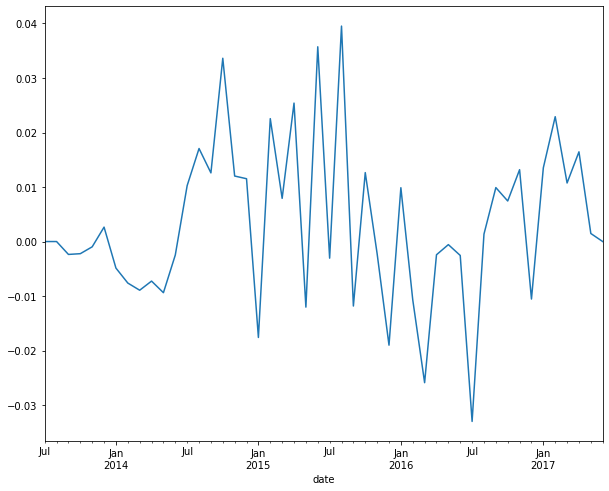

In [85]:
expected_portfolio_returns.T.sum().plot(figsize=(10, 8))

# Statistical tests

## Annualized Rate of Return

In [86]:
expected_portfolio_returns_by_date = expected_portfolio_returns.T.sum().dropna()

portfolio_ret_mean = expected_portfolio_returns_by_date.mean()

portfolio_ret_ste = expected_portfolio_returns_by_date.sem()
portfolio_ret_annual_rate = (np.exp(portfolio_ret_mean * 12) - 1) * 100

print("""
Mean:                       {:.6f}
Standard Error:             {:.6f}
Annualized Rate of Return:  {:.2f}%
""".format(portfolio_ret_mean, portfolio_ret_ste, portfolio_ret_annual_rate))


Mean:                       0.003185
Standard Error:             0.002158
Annualized Rate of Return:  3.90%



## T-Test

Our null hypothesis ($H_0$) is that the actual mean return from the signal is zero. We'll perform a one-sample, one-sided t-test on the observed mean return, to see if we can reject $H_0$.

We'll need to first compute the t-statistic, and then find its corresponding p-value. The p-value will indicate the probability of observing a t-statistic equally or more extreme than the one we observed if the null hypothesis were true. A small p-value means that the chance of observing the t-statistic we observed under the null hypothesis is small, and thus casts doubt on the null hypothesis. It's good practice to set a desired level of significance or alpha ($\alpha$) before computing the p-value, and then reject the null hypothesis if p < ($\alpha$)

For this project, we'll use $\alpha = 0.05$, since it's a common value to use.

In [87]:
from scipy import stats

def analyze_alpha(expected_portfolio_returns_by_date):
    """
    Perform a t-test with the null hypothesis being that the expected mean return is zero.
    
    Parameters
    ----------
    expected_portfolio_returns_by_date : Pandas Series
        Expected portfolio returns for each date
    
    Returns
    -------
    t_value
        T-statistic from t-test
    p_value
        Corresponding p-value
    """
    t_stastic, p_value = stats.ttest_1samp(expected_portfolio_returns_by_date, 0)
    
    return t_stastic, p_value / 2

### Let's see what values we get with our portfolio

In [88]:
t_value, p_value = analyze_alpha(expected_portfolio_returns_by_date)
print("""
Alpha analysis:
 t-value:        {:.3f}
 p-value:        {:.6f}
""".format(t_value, p_value))


Alpha analysis:
 t-value:        1.476
 p-value:        0.073339



### p-value = 0.073359. p-value > 0.05 and we cannot reject the null hypothesis which is the population mean is zero.